In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statistics import mean

warnings.filterwarnings("ignore")



In [54]:

dataset = pd.read_excel(r"D:\GitHub\House_Rent_Prices_with_Scraping\Kira_Ev_Dataset.xlsx")

dupl_entr = dataset[dataset.duplicated()] # find duplicate entries
print("Dupicate Entries: ", dupl_entr.shape)
dataset = dataset.drop_duplicates() # delete duplicate entries

excel_file = "Kira_Ev_Dataset_Modified.xlsx"

#Export to Excel
dataset.to_excel(excel_file)
print("Dataset is written to Excel File successfully.")

dataset = pd.read_excel(r"D:\GitHub\House_Rent_Prices_with_Scraping\Kira_Ev_Dataset_Modified.xlsx")

dataset.drop('Unnamed: 0', inplace=True, axis=1)

dataset = dataset.dropna() # Delete empty cells

dataset

Dupicate Entries:  (84059, 5)
Dataset is written to Excel File successfully.


,Title,Square Meters,Number of Rooms,Location,Price
0,AKSARAY MEYDAN MAHALLESİNDE KİRALIK 3+1 DAİRE,165.0,3+1,Aksaray,2800.0
1,MURAT EMLAK'TAN HÜRRİYET MAH.MAHMUTBEY CAD.ÜZE...,90.0,2+1,İstanbul,7000.0
2,1+1 FULL EŞYALI MODERN TASARIMLI DAİRELER (EML...,70.0,1+1,Ankara,9500.0
3,ERYAMAN KİRALIK 3+1 SİTE İÇERİSİNDE DAİRE+KAPA...,175.0,3+1,Ankara,12500.0
4,Samsun Atakum Atakent merkezde kiralık 3+1 Lük...,130.0,3+1,Samsun,4500.0
...,...,...,...,...,...
2111,kiralık daire,135.0,3+1,Sivas,3500.0
2112,"Nilüfer Podyum Park'a 5 dakika, 3+1 Sahibinden...",130.0,3+1,Bursa,7750.0
2113,"SELENİUM FULYA RESİDENCE, 20.KAT 4+1 210M² BOĞ...",210.0,4+1,İstanbul,60000.0
2114,BİRYER'DEN KURUÇEŞME MAHALLESİNDE EŞYALI 1+1 D...,50.0,1+1,İzmir,4750.0


In [55]:
dataset.head()

,Title,Square Meters,Number of Rooms,Location,Price
0,AKSARAY MEYDAN MAHALLESİNDE KİRALIK 3+1 DAİRE,165.0,3+1,Aksaray,2800.0
1,MURAT EMLAK'TAN HÜRRİYET MAH.MAHMUTBEY CAD.ÜZE...,90.0,2+1,İstanbul,7000.0
2,1+1 FULL EŞYALI MODERN TASARIMLI DAİRELER (EML...,70.0,1+1,Ankara,9500.0
3,ERYAMAN KİRALIK 3+1 SİTE İÇERİSİNDE DAİRE+KAPA...,175.0,3+1,Ankara,12500.0
4,Samsun Atakum Atakent merkezde kiralık 3+1 Lük...,130.0,3+1,Samsun,4500.0


In [56]:
dataset.describe

<bound method NDFrame.describe of                                                   Title  Square Meters  \
0         AKSARAY MEYDAN MAHALLESİNDE KİRALIK 3+1 DAİRE          165.0   
1     MURAT EMLAK'TAN HÜRRİYET MAH.MAHMUTBEY CAD.ÜZE...           90.0   
2     1+1 FULL EŞYALI MODERN TASARIMLI DAİRELER (EML...           70.0   
3     ERYAMAN KİRALIK 3+1 SİTE İÇERİSİNDE DAİRE+KAPA...          175.0   
4     Samsun Atakum Atakent merkezde kiralık 3+1 Lük...          130.0   
...                                                 ...            ...   
2111                                      kiralık daire          135.0   
2112  Nilüfer Podyum Park'a 5 dakika, 3+1 Sahibinden...          130.0   
2113  SELENİUM FULYA RESİDENCE, 20.KAT 4+1 210M² BOĞ...          210.0   
2114  BİRYER'DEN KURUÇEŞME MAHALLESİNDE EŞYALI 1+1 D...           50.0   
2115  Full Mobilyalı Deniz Manzaralı 2+1 Ritim İstan...          101.0   

     Number of Rooms  Location    Price  
0                3+1   Aksaray   28

In [57]:
dataset.isnull().sum()

Title              0
Square Meters      0
Number of Rooms    0
Location           0
Price              0
dtype: int64

In [58]:
mean_rent = mean(dataset["Price"])
mean_rent = int(round(mean_rent,0))

print("Mean of House Rental Prices in Turkey:", mean_rent,"TL \n")

print("Information about the Cheapest Rental House:\n\n",dataset.loc[dataset['Price'].idxmin()], "\n")

print("Information about the Most Expensive Rental House:\n\n",dataset.loc[dataset['Price'].idxmax()], "\n")


Mean of House Rental Prices in Turkey: 11151 TL 

Information about the Cheapest Rental House:

 Title              ÖREN MERKEZDE 1+1 EŞYALI DAİRE
Square Meters                                67.0
Number of Rooms                               1+1
Location                                Balıkesir
Price                                       300.0
Name: 2102, dtype: object 

Information about the Most Expensive Rental House:

 Title              bodrum Turgutreis kadikalesi denize sıfır
Square Meters                                          110.0
Number of Rooms                                          2+1
Location                                               Muğla
Price                                               300000.0
Name: 346, dtype: object 



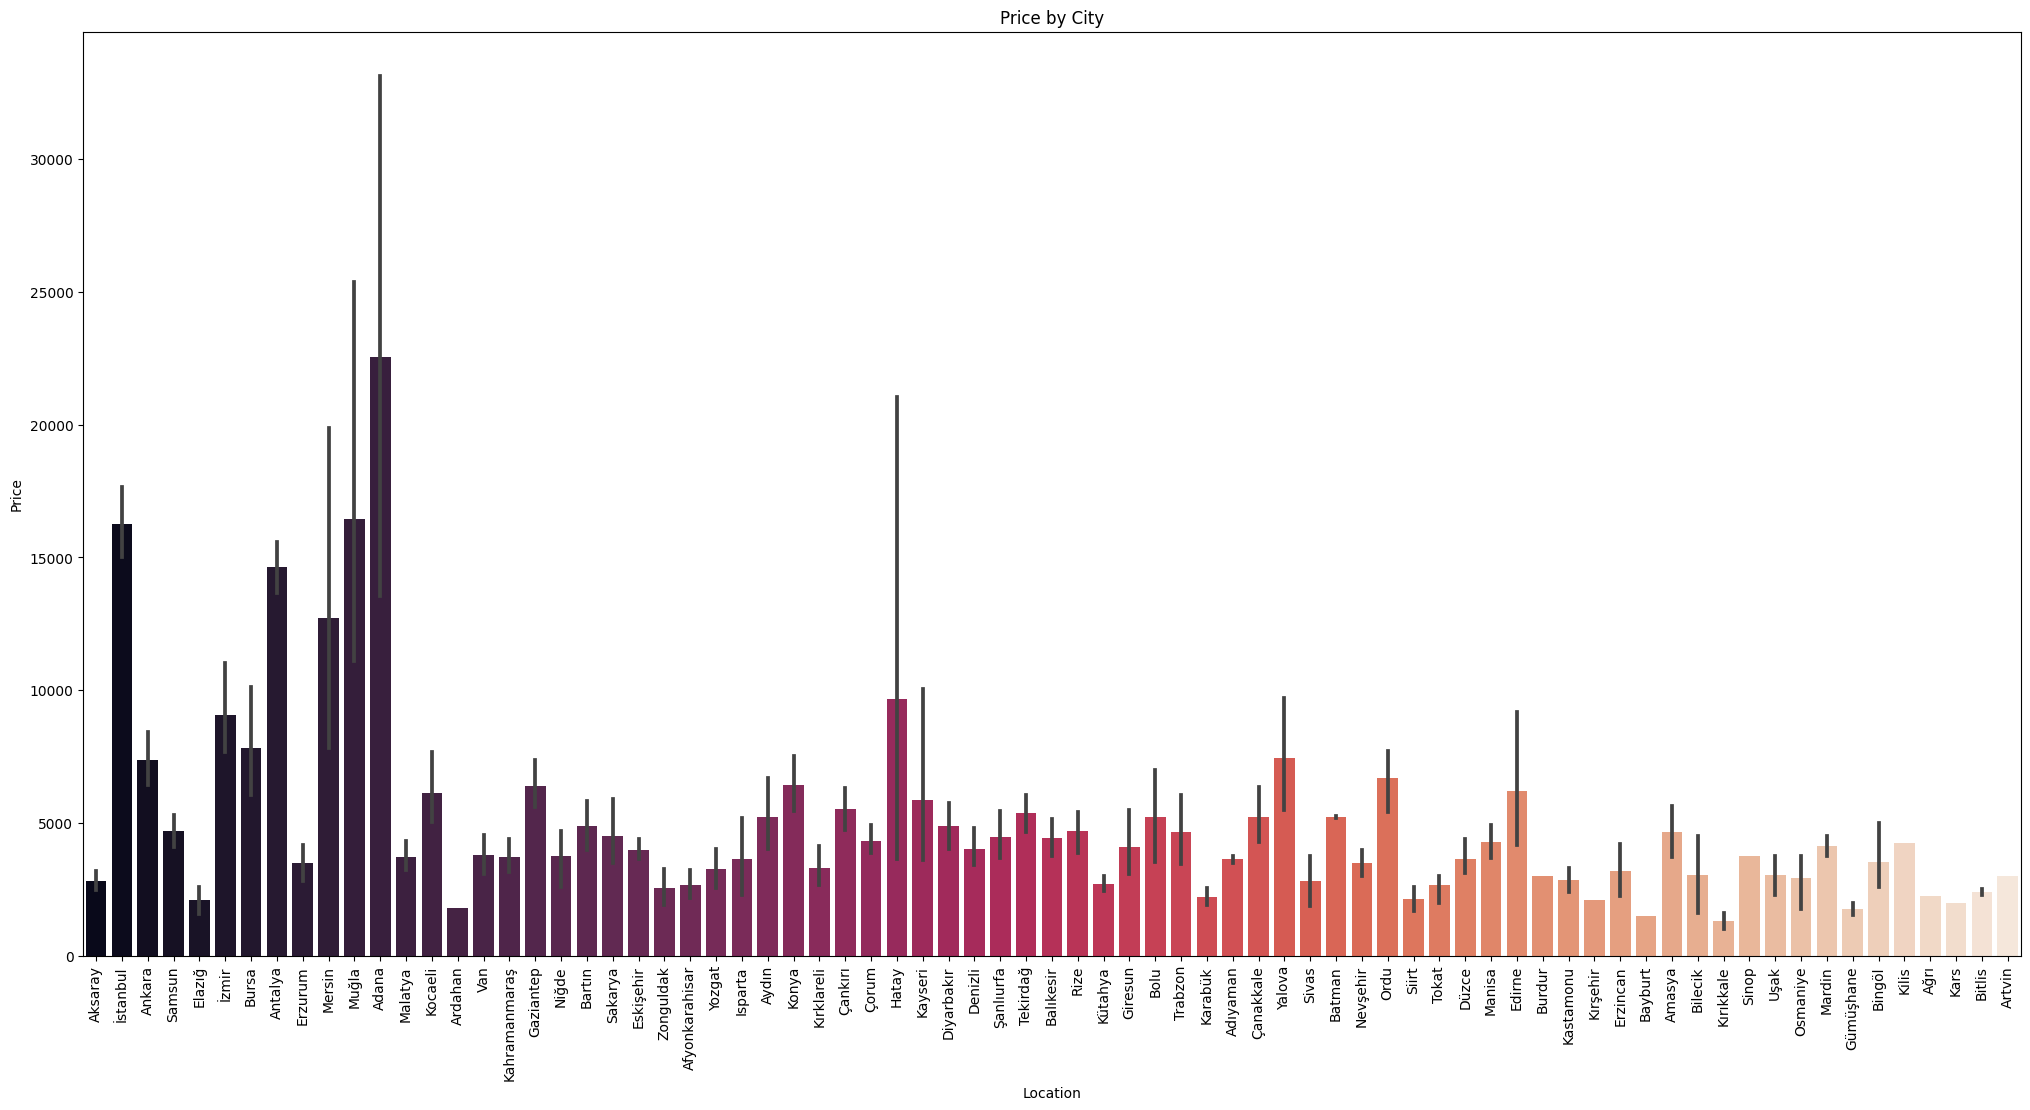

In [59]:
plt.subplots(figsize=(25,12))
sns.barplot(data=dataset, y="Price", x="Location", palette="rocket")
plt.xticks(rotation=90)
plt.title("Price by City")
plt.show()

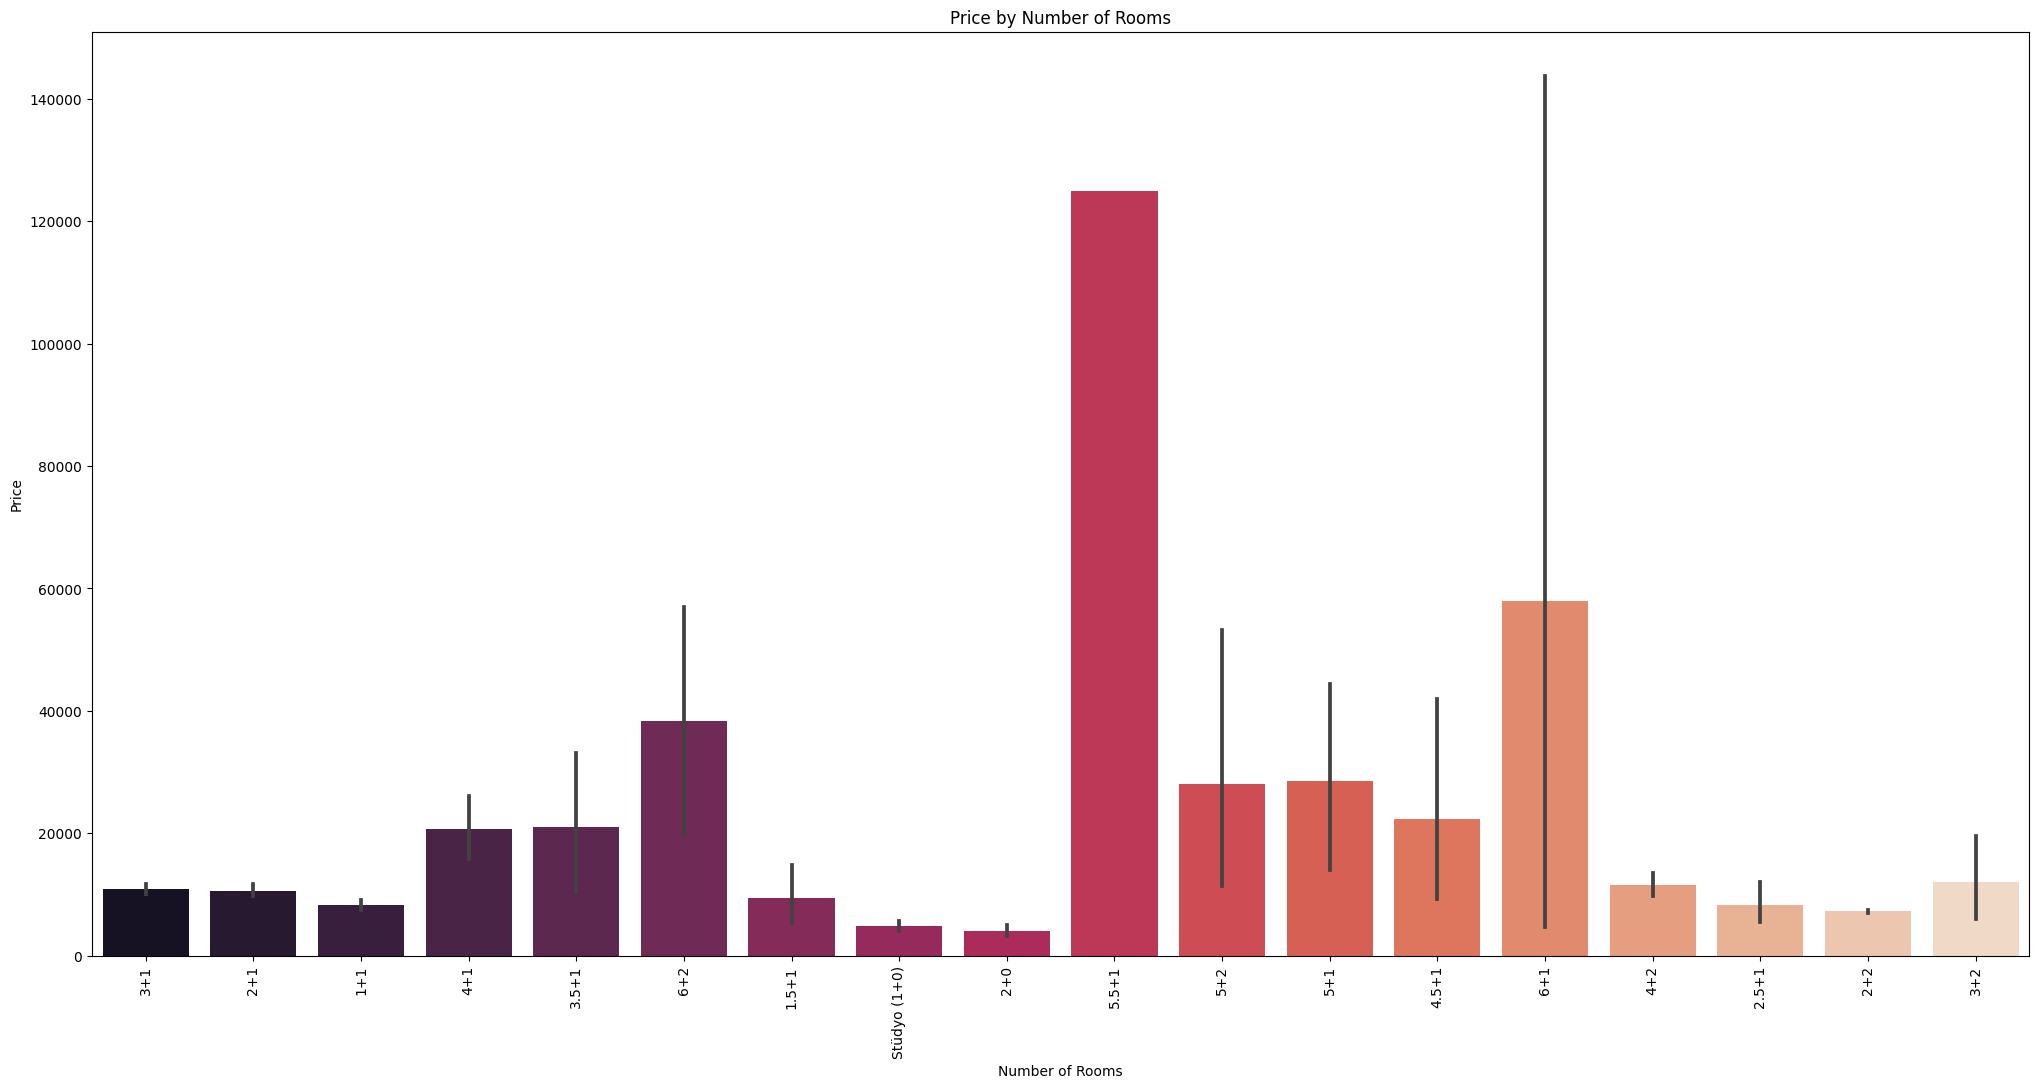

In [61]:
plt.subplots(figsize=(25,12))
sns.barplot(data=dataset, y="Price", x="Number of Rooms", palette="rocket")
plt.xticks(rotation=90)
plt.title("Price by Number of Rooms")
plt.show()

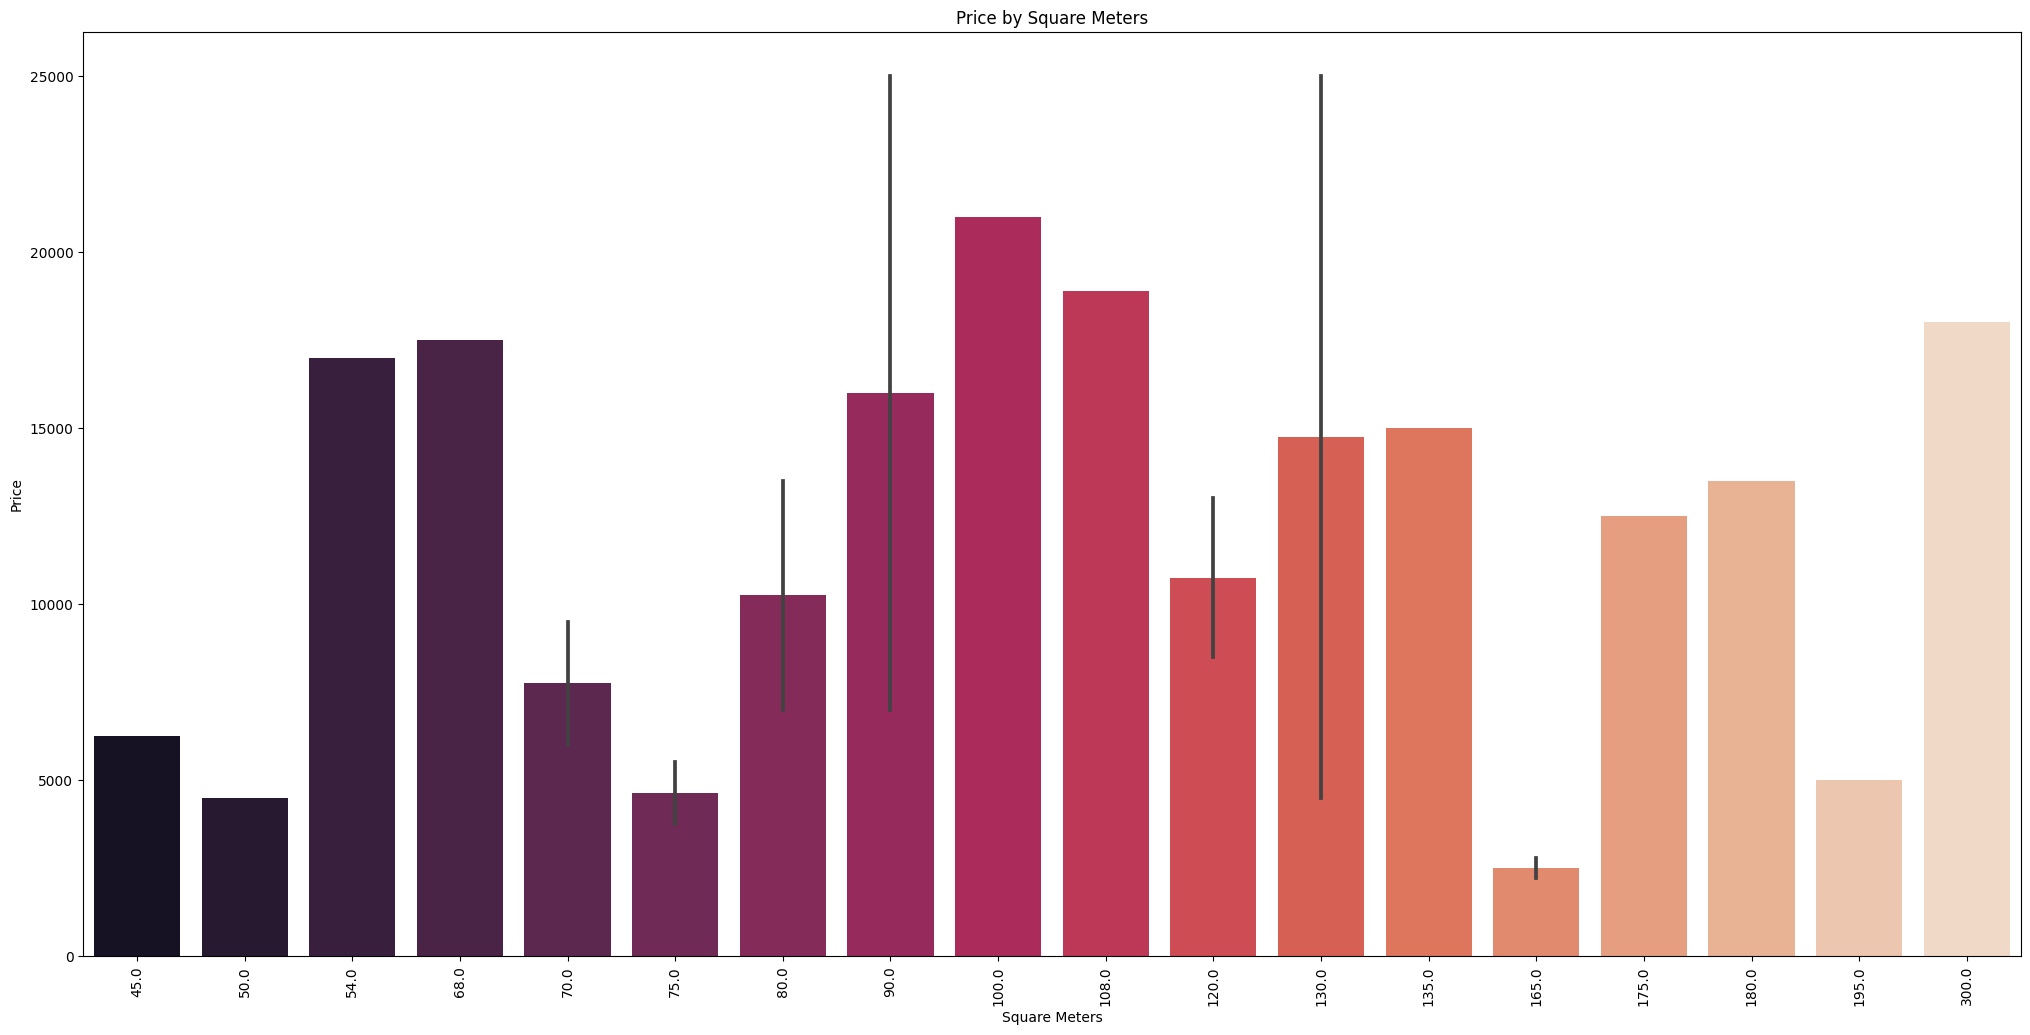

In [62]:
plt.subplots(figsize=(25,12))
sns.barplot(data=dataset, y=dataset["Price"], x=dataset["Square Meters"][:25], palette="rocket")
plt.xticks(rotation=90)
plt.title("Price by Square Meters")
plt.show()